In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Calculus in SymPy ##

Working with densities involves calculus which can sometimes be time-consuming. This course gives you two ways of reducing the amount of calculus involved.

- Probabilistic methods can help reduce algebra and calculus. You've seen this with algebra in the discrete case. You'll see it with calculus as we learn more about densities.
- Python has a symbolic math module called `SymPy` that does algebra, calculus, and much other symbolic math. In this section we will show you how to do calculus using `SymPy`.

We will demonstrate the methods in the context of an example. Suppose $X$ has density given by

$$
f(x) = 
\begin{cases}
105x^2(1-x)^4 ~~~ \text{if } 0 \le x \le 1 \\
0 ~~~~~~~~~ \text{otherwise}
\end{cases}
$$

As you can see from its graph below, $f$ could be used to model the distribution of a random proportion that you think is likely to be somewhere between 0.2 and 0.4.

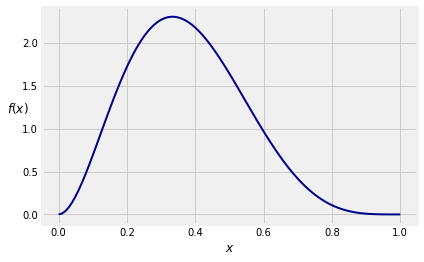

In [3]:
# NO CODE
x_vals = np.arange(0, 1.01, 0.01)
f = 105 * x_vals**2 * (1 - x_vals)**4
plt.plot(x_vals, f, color='darkblue', lw=2)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0);

The density $f$ is a polynomial on the unit interval, and in principle the algebra and calculus involved in integrating it are straightforward. But they are tedious. So let's get `SymPy` to do the work.

First, we will import all the functions in `SymPy` and set up some printing methods that make the output look nicer than the retro typewritten pgf output you saw in a previous section. In future sections of this text, you can assume that this importing and initialization will have been done at the start.

In [4]:
from sympy import *
init_printing()

Next, we have to create tell Python that an object is symbolic. In our example, the variable $x$ is the natural candidate to be a symbol. You can use `Symbol` for this, by using the argument `'x'`. We have assinged the symbol to the name `x`.

In [6]:
x = Symbol('x')

Now we will assign the name `density` to the expression that defines $f$. The expression looks just like a numerical calculation, but the output is algebraic!

In [7]:
density = 105 * x**2 * (1-x)**4
density

That's the expression for $f(x)$ defined by the equation at the start of the section. Notice that what we naturally think of as $1 - x$ is expressed as $-x + 1$. That's because `SymPy` is writing the polynomial leading with the term of highest degree.

Let's not simply accept that this function is a density. Let's check that it is a density by integrating it from 0 to 1. To display this, we use the method `Integral` that takes the name of a function and a *tuple* (a sequence in parentheses) consisting of the variable of integration and the lower and upper limits of integration. We have assigned this integral to the name `total_area`.

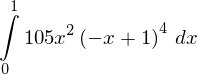

In [8]:
total_area = Integral(density, (x, 0, 1))
total_area

The output of displays the integral, which is nice, but what we really want is its numerical value. In `SymPy`, this is achieved by abruptly instructing the method to `doit()`.

In [9]:
total_area.doit()

This confirms that the function $f$ is a density.

We can use `Integral` to find the chance that $X$ is in any interval. Here is $P(0.2 < X < 0.4)$.

In [10]:
prob_02_04 = Integral(density, (x, 0.2, 0.4)).doit()
prob_02_04

For $x$ in the unit interval, the cdf of $X$ is

$$
F(x) ~ = ~ P(X \le x) ~ = ~ \int_0^x f(s)ds ~ = ~ I(s)~ \Big\rvert_0^x ~ = ~ I(x) - I(0)
$$

where $I$ is the indefinite integral of $f$.

To get the indefinite integral, simply ask `SymPy` to integrate the density; there are no limits of integration.

In [11]:
indefinite = Integral(density).doit()
indefinite

Now $F(x) = I(x) - I(0)$. You can see at a glance that $I(0) = 0$ but here is how `SymPy` would figure that out.

To evaluate $I(0)$, `SymPy` must substitute $x$ with 0 in the expression for $I$. This is achieved by the method `subs` that takes the variable as its first argument and the specified value as the second.

In [12]:
I_0 = indefinite.subs(x, 0)
I_0

In [13]:
cdf = indefinite - I_0
cdf

To find the value of the cdf at a specified point, say 0.4, we have to substitute $x$ with 0.4 in the formula for the cdf. 

In [14]:
cdf_at_04 = cdf.subs(x, 0.4)
cdf_at_04

Thus $P(X \le 0.4)$ is roughly 58%. Earlier we calulated $P(0.2 < X < 0.4) = 43.2\%$, which we can confirm by using the cdf:

In [15]:
cdf_at_02 = cdf.subs(x, 0.2)
cdf_at_04 - cdf_at_02

The expectation $E(X)$ is a definite integral from 0 to 1:

In [16]:
expectation = Integral(x*density, (x, 0, 1)).doit()
expectation

Notice how simple the answer is. Later in the course, you will see why.

Here is $E(X^2)$, which turns out to be another simple fraction. Clearly, the density $f$ has interesting properties. We will study them later. For now, let's just get the numerical answers.

In [17]:
expected_square = Integral((x**2)*density, (x, 0, 1)).doit()
expected_square

Now you can find $SD(X)$.

In [18]:
sd = (expected_square - expectation**2)**0.5
sd

### SymPy and the Exponential Density ###
One of the primary distributions in probability theory, the exponential distribution has a positive parameter $\lambda$ known as the "rate", and density given by

$$
f(t) ~ = \lambda e^{-\lambda t}, ~~~ t \ge 0
$$

The density is 0 on the negative numbers. Here is its graph when $\lambda = 3$.

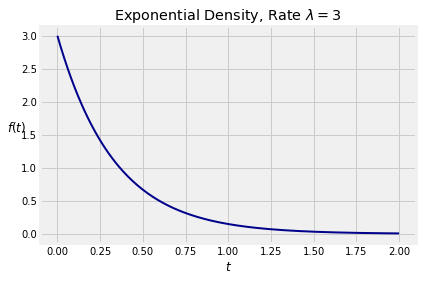

In [19]:
# NO CODE

lam = 3
tt = np.arange(0, 2.01, 0.01)
f = lam * np.exp(-1*lam*tt)
plt.plot(tt, f, color='darkblue', lw=2)
plt.xlabel('$t$')
plt.ylabel('$f(t)$', rotation=0)
plt.title('Exponential Density, Rate $\lambda = 3$');

To check that $f$ is a density, we have to confirm that its integral is 1. We will start by constructing two symbols, `t` and `lamda`. Notice the incorrectly spelled `lamda` instead of `lambda`. That is because `lambda` has another meaning in Python, as some of you might know.

Note the use of `positive=True` to specify that the symbol can take on only positive values.

In [21]:
t = Symbol('t', positive=True)
lamda = Symbol('lamda', positive=True)

Next we construct the expression for the density. Notice the use of `exp` for the exponential function. 

In [22]:
expon_density = lamda * exp(-lamda * t)
expon_density

To see that the function is a density, we can check that its integral from 0 to $\infty$ is 1. The symbol that `SymPy` uses for $\infty$ is `oo`, a double lower case o. It looks very much like $\infty$.

In [23]:
Integral(expon_density, (t, 0, oo)).doit()

Suppose $T$ has the exponential $(\lambda)$ density. Then for $t \ge 0$ the cdf of $T$ is 

$$
F_T(t) ~ = ~ P(T \le t) ~ = ~ \int_0^t \lambda e^{-\lambda s}ds
$$

This is a straightforward integral that you can probably do in your head. However, let's get some more practice using `SymPy` to find cdf's.
We will use the same method that we used to find the cdf in the previous example.

$$
\int_0^t \lambda e^{-\lambda s}ds ~ = ~ I(t) - I(0)
$$

where $I$ is the indefinite integral of the density. To get this indefinite integral we will use `Integral` as before, except that this time we must specify `t` as the variable of integration. That is because `SymPy` sees two symbols `t` and `lamda` in the density, and doesn't know which one is the variable unless we tell it.

In [24]:
indefinite = Integral(expon_density, t).doit()
indefinite

Now use $F_T(t) = I(t) - I(0)$:

In [25]:
I_0 = indefinite.subs(t, 0)
I_0

In [26]:
cdf = indefinite - I_0
cdf

Thus the cdf of $T$ is

$$
F_T(t) ~ = ~ 1 - e^{-\lambda t}
$$

The expectation of $T$ is

$$
E(T) ~ = ~ \int_0^\infty t \lambda e^{-\lambda t} dt ~ = ~ \frac{1}{\lambda}
$$

which you can check by integration by parts. But `SymPy` is faster:

In [27]:
expectation = Integral(t*expon_density, (t, 0, oo)).doit()
expectation

Calculating $E(T^2)$ is just as easy.

In [28]:
expected_square = Integral(t**2 * expon_density, (t, 0, oo)).doit()
expected_square

The variance and SD follow directly.

In [29]:
variance = expected_square - (expectation ** 2)
variance

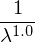

In [31]:
sd = variance ** 0.5
sd

That's a pretty funny way of writing $\frac{1}{\lambda}$ but we'll take it. It's a small price to pay for not having to do all the integrals by hand.